In [2]:
import pandas as pd

In [3]:
movies = pd.read_csv("fandango_score_comparison.csv")

In [4]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

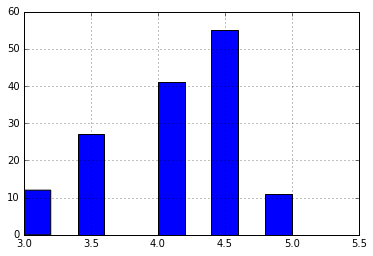

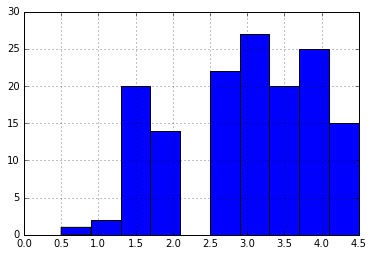

In [6]:
movies["Fandango_Stars"].hist()
plt.show()
movies["Metacritic_norm_round"].hist()
plt.show()

The review scores for Fandango are on average higher than at Metacritc, and there are no scores below 3 stars at Fandango.

In [7]:
print(movies["Fandango_Stars"].mean())
print(movies["Metacritic_norm_round"].mean())

4.08904109589
2.97260273973


In [8]:
print(movies["Fandango_Stars"].median())
print(movies["Metacritic_norm_round"].median())

4.0
3.0


In [9]:
print(movies["Fandango_Stars"].std())
print(movies["Metacritic_norm_round"].std())

0.540385977979
0.990960561374


The Metacritic scores are a weighted average of critics scores, but Fandango scores are from user reviews, and round up to the next highest half star sometimes, instead of to the next closest half star.

The mean for Fandango_Stars is higher than the median because there are a large number of 5 star reviews on Fandango.  The standard deviation for Fandango_Stars is much lower than for Metacritic_norm_round, because all the scores in Fandango are grouped between 3 and 5, but are spread across the full range of 0-5 in Metacritic. The mean for Fandango_Stars is much higher because Fandango's algorithm incorrectly rounds up sometimes when it should round down.

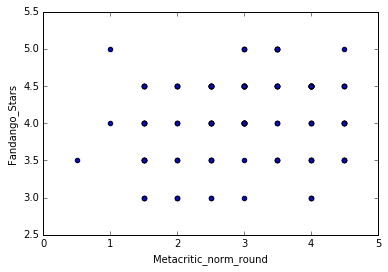

In [11]:
movies.plot.scatter("Metacritic_norm_round", "Fandango_Stars")

In [12]:
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]

In [13]:
import numpy as np
movies["fm_diff"] = np.absolute(movies["fm_diff"])

In [15]:
sorted_movies = movies.sort_values("fm_diff", ascending=False).head()
sorted_movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [16]:
from scipy.stats import pearsonr

In [18]:
r = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
r[0]

0.17844919073895918

The Fandango_Stars and Metacritic_norm_round columns aren't very correlated because one's from users and the other is from critics, and because Fandango's algorithm inflates their scores.

In [19]:
from scipy.stats import linregress

In [28]:
x = movies["Metacritic_norm_round"]
y = movies["Fandango_Stars"]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
slope, intercept

(0.097311077973928267, 3.7997739188994188)

In [23]:
pred_3 = 3 * slope + intercept
pred_3

4.0917071528212041

In [24]:
pred_1 = 1 * slope + intercept
pred_1

3.897084996873347

In [26]:
pred_5 = 5 * slope + intercept
pred_5

4.2863293087690604

(1, 5)

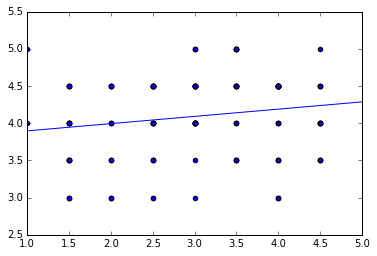

In [32]:
plt.scatter(x,y)
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim(1, 5)